# ECE532 Final Project: Clustering Congressional Districts

### Michael Hickey, Thomas Hillebrand, Ryan Milanowski

Load Libraries

In [82]:
library(dplyr)
library(ggplot2)
library(magrittr)

## Sample Dataset: Review of Clustering Algorithms

"iris" is the name of a sample dataset built into the R program. We can compare values of sepal and petal sizes of different species

In [3]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Let's plot the petal size data to see what it looks like:

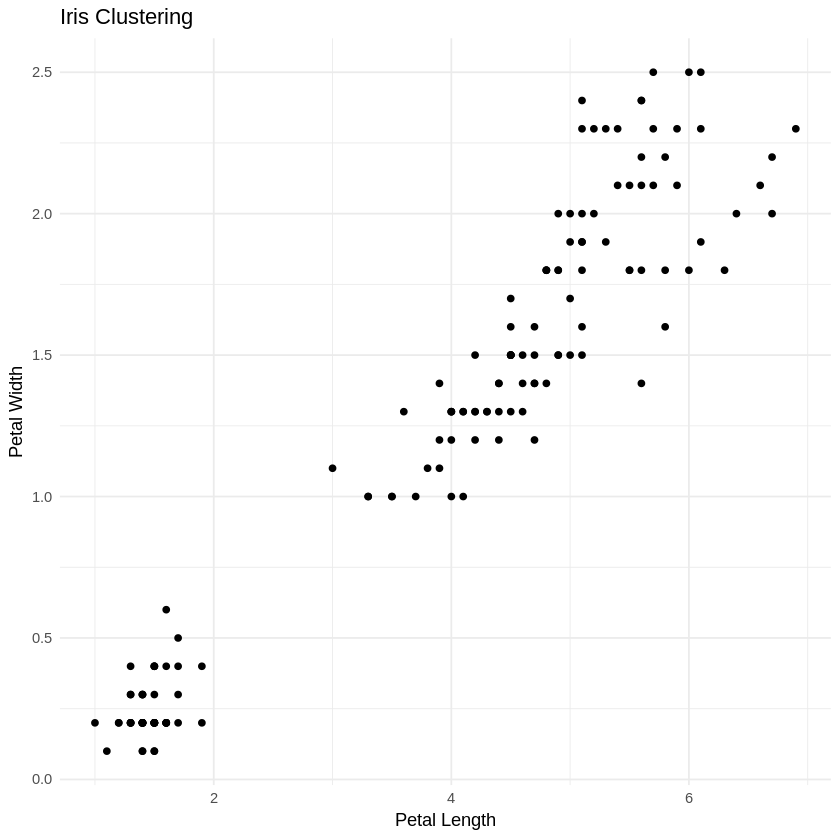

In [83]:
ggplot(iris) +
    geom_point(aes(x = Petal.Length, y = Petal.Width)) +
    labs(x = "Petal Length", y = "Petal Width", title = "Iris Clustering") +
    theme_minimal()

We can see some natural clusters in the data. Let's apply k-means:

INSERT WRITEUP SUMMARIZING THE K-MEANS METHOD

First, we should scale the data (mean = 0, sd = 1)

INSERT WRITEUP ON WHY SCALING IS IMPORTANT

In [93]:
# We only need the two columns of data that we will be clustering
TestData <- iris %>% transmute(Petal.Length, Petal.Width)

# Scaling Data
TestData$Petal.Length <- (TestData$Petal.Length-mean(TestData$Petal.Length))/sd(TestData$Petal.Length)
TestData$Petal.Width <- (TestData$Petal.Width-mean(TestData$Petal.Width))/sd(TestData$Petal.Width)


INSERT WRITEUP DESCRIBING INPUT VALUES OF K AND MAXITER

(Maybe have participants run the below code block with differing values of "K" and "MaxIter" and describe how the results change)

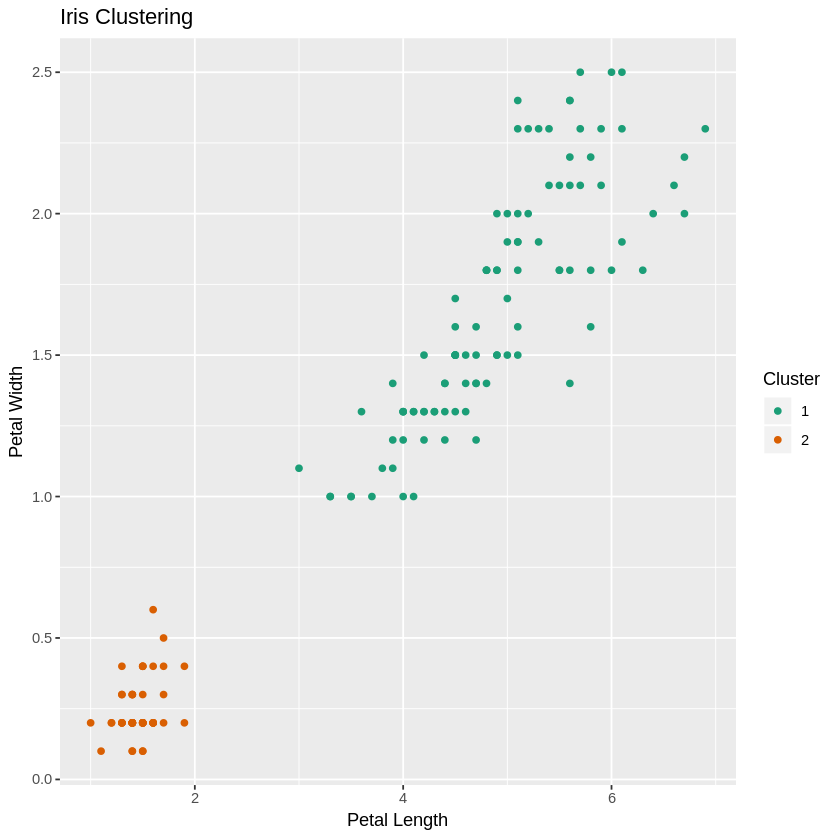

In [111]:
#set.seed(1)
# Set Parameters
K <- 2           # Number of clusters
MaxIter <- 10     # Maximum number of kmeans iterations

clust <- kmeans(TestData, centers = K, iter.max = MaxIter)

TestData2 <- iris
TestData2$cluster <- as.factor(clust$cluster)

ggplot(TestData2) +
    geom_point(aes(x = Petal.Length, y = Petal.Width, color = cluster)) +
    labs(x = "Petal Length", y = "Petal Width", title = "Iris Clustering",
         color = "Cluster") + 
    scale_color_brewer(palette = "Dark2")

### Initializing Cluster Centers

INSERT WRITEUP DESCRIBING EFFECTS OF INITIAL CLUSTER CENTERS

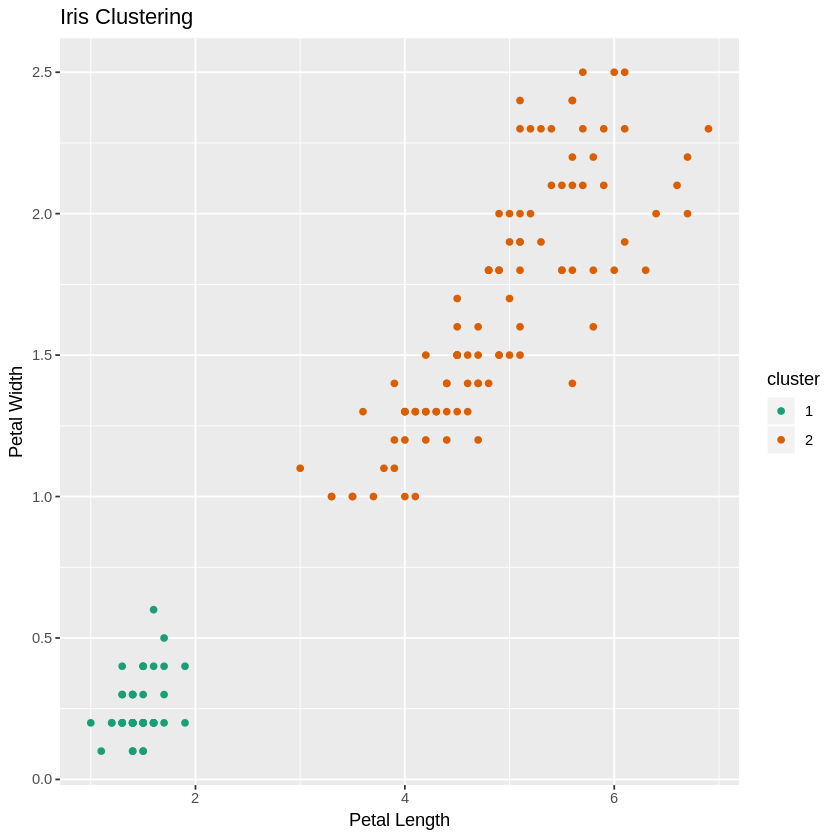

In [97]:
K <- 2
MaxIter <- 1

# Set Initial Values for Cluster Center Locations
InitCenters <- NULL
InitCenters$Petal.Length <- (1:K)
InitCenters$Petal.Width <- (1:K)

# The cluster centers are initially equally distributed through the scaled data
InitCenters$Petal.Length <- (InitCenters$Petal.Length - mean(InitCenters$Petal.Length))/sd(InitCenters$Petal.Length)
InitCenters$Petal.Width <- (InitCenters$Petal.Width - mean(InitCenters$Petal.Width))/sd(InitCenters$Petal.Width)
InitCenters <- as.data.frame(InitCenters)

clust <- kmeans(TestData, centers = InitCenters, iter.max = MaxIter)

TestData2 <- iris
TestData2$cluster <- as.factor(clust$cluster)

ggplot(TestData2) +
    geom_point(aes(x = Petal.Length, y = Petal.Width, color = cluster)) +
    labs(x = "Petal Length", y = "Petal Width", title = "Iris Clustering",
         color = "Cluster") + 
    scale_color_brewer(palette = "Dark2")

## Clustering Applications for Drawing Congressional Districts

INSERT BACKGROUND ON APPLICATION (GERRYMANDERING/PARTISAN BIAS/ETC)

The data we will be clustering is from the US Census Bureau (https://www.census.gov/geographies/reference-files/time-series/geo/centers-population.html). It represents the distribution of Census Tracts in the state of Wisconsin. For the purposes of this assignment, we can make the simplifying assumption that each Census tract is associated with an equal population size. While this assumption is inaccurate, it sufficiently reduces the data size and computational time to allow for a reasonable timeframe for completing the assignment.

In [107]:
Data <- read.csv("Wisconsin.csv")
head(Data, 8) # Preview first 8 rows of data
print(paste0("Data consists of ", nrow(Data), " unique Wisconsin Census Tracts"))

STATEFP,COUNTYFP,TRACTCE,POPULATION,LATITUDE,LONGITUDE
55,1,950100,2973,44.20459,-89.79452
55,1,950201,1379,44.00266,-89.87121
55,1,950202,2674,44.08551,-89.81285
55,1,950400,4767,43.95711,-89.79967
55,1,950501,1469,43.89843,-89.90778
55,1,950502,4112,43.83633,-89.71931
55,1,950700,3501,43.72165,-89.71139
55,3,940000,1867,46.54245,-90.68217


[1] "Data consists of 1409 unique Wisconsin Census Tracts"


The first 8 rows of the dataset are previewed above. Each row represents an individual Cencus tract and has a unique combination of the first three columns (State, County, and Tract Code). The LATITUDE and LONGITUDE values represent the "center of gravity" of each Census tract. 

In the next code block, we clean and scale the data.

In [108]:
# Reducing data set to only clustering parameters
CongressData <- Data %>% transmute(LATITUDE, LONGITUDE)

# Scaling Data
CongressData$LATITUDE <- (CongressData$LATITUDE-mean(CongressData$LATITUDE))/sd(CongressData$LATITUDE)
CongressData$LONGITUDE <- (CongressData$LONGITUDE-mean(CongressData$LONGITUDE))/sd(CongressData$LONGITUDE)

### Drawing Congressional Districts with K-Means Clustering 

Now, we can apply K-Means in order to cluster the Census data into proposed Congressional districts

In [ ]:
# Set Input Values
K = 8
IterMax = 5

# Run K-Means Algorithm
CongressCluster <- kmeans(CongressData, centers = K, iter.max = IterMax)

# Unscale data for plotting and extract clusters associated with each Census tract
PlotCongressData <- Data %>% transmute(LATITUDE, LONGITUDE, POPULATION)
PlotCongressData$cluster <- CongressCluster$cluster

# Create dataframe for plotting cluster centers
Centers <- as.data.frame(CongressCluster$centers)
Centers$LATITUDE <- Centers$LATITUDE*sd(PlotCongressData$LATITUDE) + mean(PlotCongressData$LATITUDE)
Centers$LONGITUDE <- Centers$LONGITUDE*sd(PlotCongressData$LONGITUDE) + mean(PlotCongressData$LONGITUDE)
Centers$cluster <- 1:K

Next, the clustering results are plotted:

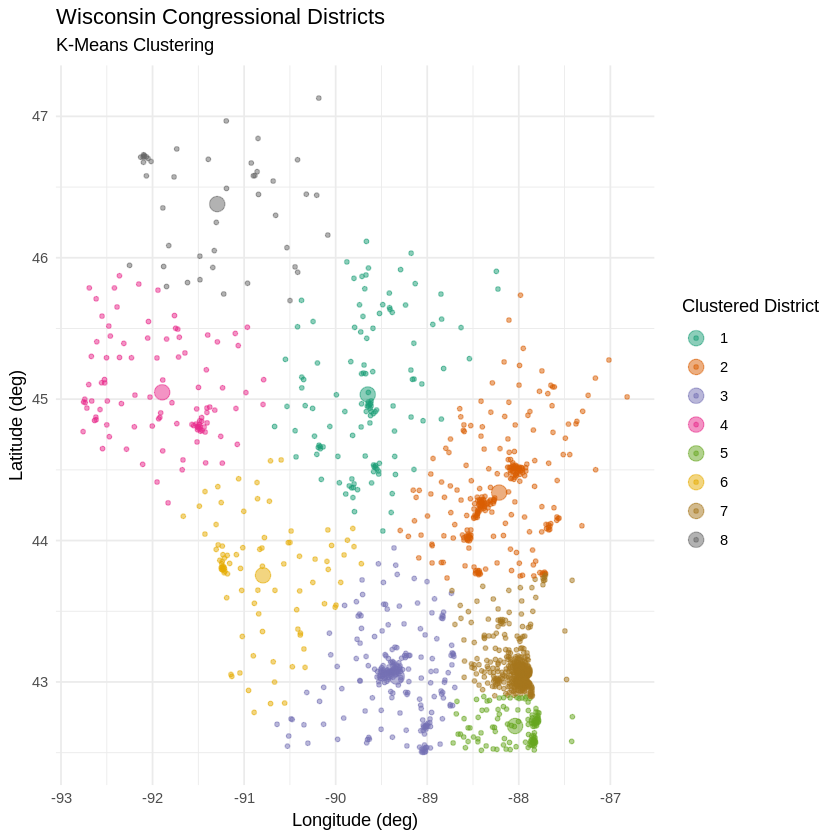

In [99]:
ggplot() +
    geom_point(data = PlotCongressData,
               aes(x = LONGITUDE, y = LATITUDE, color = as.factor(cluster)),
               alpha = 1/2, size = 1) +
    geom_point(data = Centers,
               aes(x = LONGITUDE, y = LATITUDE, color = as.factor(cluster)),
               alpha = 1/2, size = 4) +
    labs(x = "Longitude (deg)", y = "Latitude (deg)", title = "Wisconsin Congressional Districts",
         subtitle = "K-Means Clustering",
         color = "Clustered District") + 
    theme_minimal() +
    scale_color_brewer(palette = "Dark2")

The resulting districts vary greatly in terms of the number of constituent Census tracts. This presents a problem, because our application calls for districts of roughly equal populations.

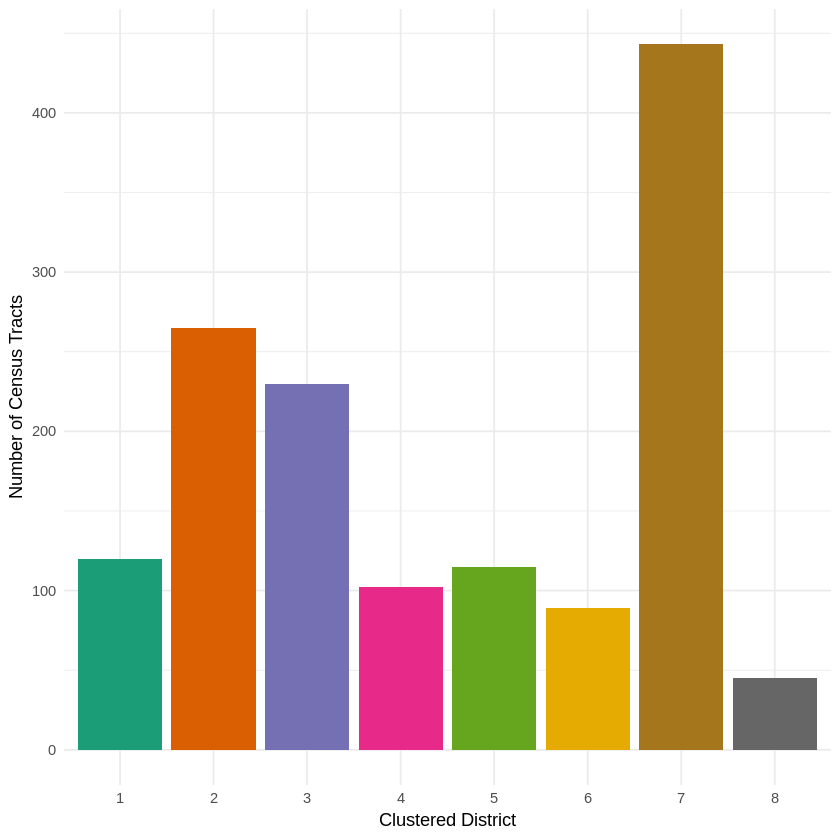

In [92]:
ggplot(CongressData2 %>% group_by(cluster) %>% summarize(Count = n())) +
    geom_col(aes(x = as.factor(cluster), y = Count, fill = as.factor(cluster))) +
    labs(x = "Clustered District", y = "Number of Census Tracts") + 
    theme_minimal() +
    theme(legend.position="none") +
    scale_fill_brewer(palette = "Dark2")

Shown above, District 7 (centered on the city of Milwaukee) contains a vastly greater population than any other clustered district. 

### Drawing Congressional Districts with Equal-Sized K-Means Clustering 

Code for Equal-Sized K-Means below:

In [112]:
# https://rviews.rstudio.com/2019/06/13/equal-size-kmeans/
set.seed(1)
k = 8
iter = 25
kdat = as.data.frame(CongressData)
kdat %>% kmeans(k) -> kclust

kdist = function(x1, y1, x2, y2){
  sqrt((x1-x2)^2 + (y1-y2)^2)
}

centers = kclust$centers
converged <- 0


for (looper in 1:iter) {
    
    # Determine distance from each district to each cluster center
    kdat %<>% 
      mutate(D1 = kdist(LATITUDE, LONGITUDE, centers[1,1], centers[1,2]))
    kdat %<>% 
      mutate(D2 = kdist(LATITUDE, LONGITUDE, centers[2,1], centers[2,2]))
    kdat %<>% 
      mutate(D3 = kdist(LATITUDE, LONGITUDE, centers[3,1], centers[3,2]))
    kdat %<>% 
      mutate(D4 = kdist(LATITUDE, LONGITUDE, centers[4,1], centers[4,2]))
    kdat %<>% 
      mutate(D5 = kdist(LATITUDE, LONGITUDE, centers[5,1], centers[5,2]))
    kdat %<>% 
      mutate(D6 = kdist(LATITUDE, LONGITUDE, centers[6,1], centers[6,2]))
    kdat %<>% 
      mutate(D7 = kdist(LATITUDE, LONGITUDE, centers[7,1], centers[7,2]))
    kdat %<>% 
      mutate(D8 = kdist(LATITUDE, LONGITUDE, centers[8,1], centers[8,2]))

    kdat$assigned = 0
    kdat$index = 1:nrow(kdat)
    working = kdat
    FirstRound = nrow(kdat) - (nrow(kdat) %% k)

    for(i in 1:FirstRound){ 
      #cluster counts can be off by 1 due to uneven multiples of k. 
      j = if(i %% k == 0) k else (i %% k)
      itemloc = 
        working$index[which(working[,(paste0("D", j))] ==
        min(working[,(paste0("D",j))]))[1]]
      kdat$assigned[kdat$index == itemloc] = j
      working %<>% filter(!index == itemloc)
    }

    for(i in 1:nrow(working)){
      #these leftover points get assigned to whoever's closest, without regard to k
      kdat$assigned[kdat$index ==
                      working$index[i]] = 
        which(working[i,3:(k+2)] == min(working[i, 3:(k+2)])) 
    }

    NewCenters <- kdat %>% filter(assigned == 1) %>% 
                            select(LATITUDE, LONGITUDE) %>%
                            kmeans(1) %$% centers

    NewCenters %<>% rbind(kdat %>% 
                            filter(assigned == 2) %>%
                            select(LATITUDE, LONGITUDE) %>%
                            kmeans(1) %$% centers)

    NewCenters %<>% rbind(kdat %>% 
                            filter(assigned == 3) %>%
                            select(LATITUDE, LONGITUDE) %>%
                            kmeans(1) %$% centers)

    NewCenters %<>% rbind(kdat %>%
                            filter(assigned == 4) %>%
                            select(LATITUDE, LONGITUDE) %>%
                            kmeans(1) %$% centers)

    NewCenters %<>% rbind(kdat %>% 
                            filter(assigned == 5) %>%
                            select(LATITUDE, LONGITUDE) %>%
                            kmeans(1) %$% centers)

    NewCenters %<>% rbind(kdat %>%
                            filter(assigned == 6) %>%
                            select(LATITUDE, LONGITUDE) %>%
                            kmeans(1) %$% centers)

    NewCenters %<>% rbind(kdat %>% 
                            filter(assigned == 7) %>%
                            select(LATITUDE, LONGITUDE) %>%
                            kmeans(1) %$% centers)

    NewCenters %<>% rbind(kdat %>%
                            filter(assigned == 8) %>%
                            select(LATITUDE, LONGITUDE) %>%
                            kmeans(1) %$% centers)

    NewCenters %<>% as.data.frame()
    
    if(identical(NewCenters, centers)) {
        converged <- 1
        break
    }
       
    
    centers <- NewCenters
    
    if(looper == iter) {
        print("Warning: Did not converge")
    }
        
    }

[1] "Warning: Did not converge"


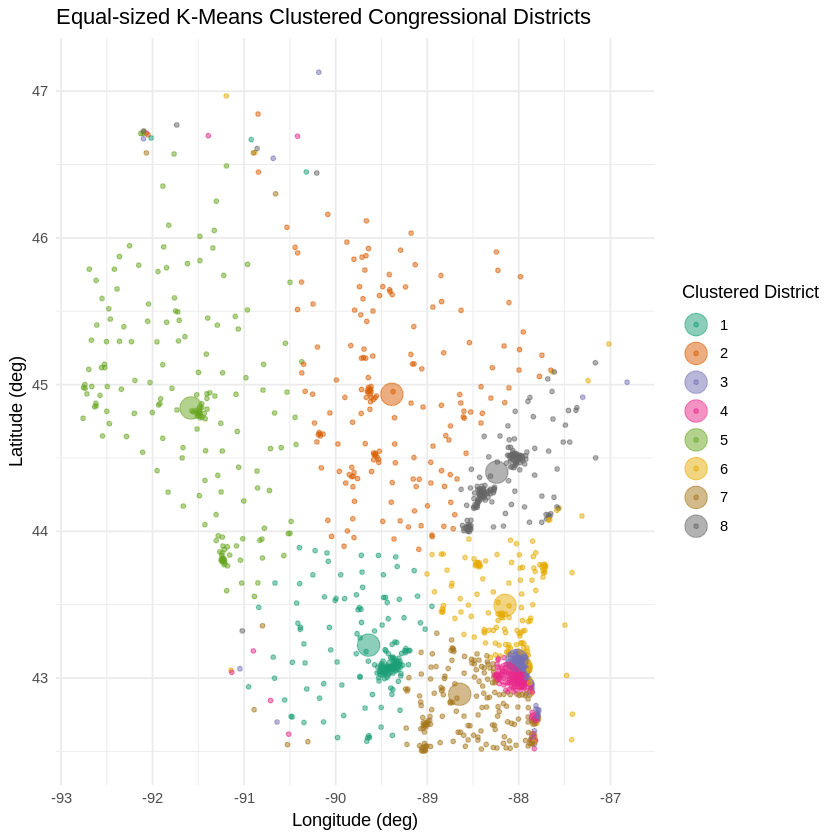

In [66]:
kdat$assigned %<>% as.factor()

# Descale data for plotting
plotdata <- Data %>% transmute(LONGITUDE, LATITUDE)
plotdata$cluster <- kdat$assigned

NewCenters$cluster <- 1:k
plotCenters <- NewCenters
plotCenters$LATITUDE <- (plotCenters$LATITUDE*sd(plotdata$LATITUDE))+mean(plotdata$LATITUDE)
plotCenters$LONGITUDE <- (plotCenters$LONGITUDE*sd(plotdata$LONGITUDE))+mean(plotdata$LONGITUDE)

ggplot() +
geom_point(data = plotdata,
           aes(x = LONGITUDE, y = LATITUDE, color = as.factor(cluster)), 
           size = 1, alpha = 1/2) +
  geom_point(data = plotCenters, aes(x = LONGITUDE, y = LATITUDE, color = as.factor(cluster)),
             size = 6, alpha = 1/2)  + 
  labs(x = "Longitude (deg)", y = "Latitude (deg)", 
       title = "Equal-sized K-Means Clustered Congressional Districts",
       color = "Clustered District") +
  scale_color_brewer(palette = "Dark2") +
  theme_minimal() 

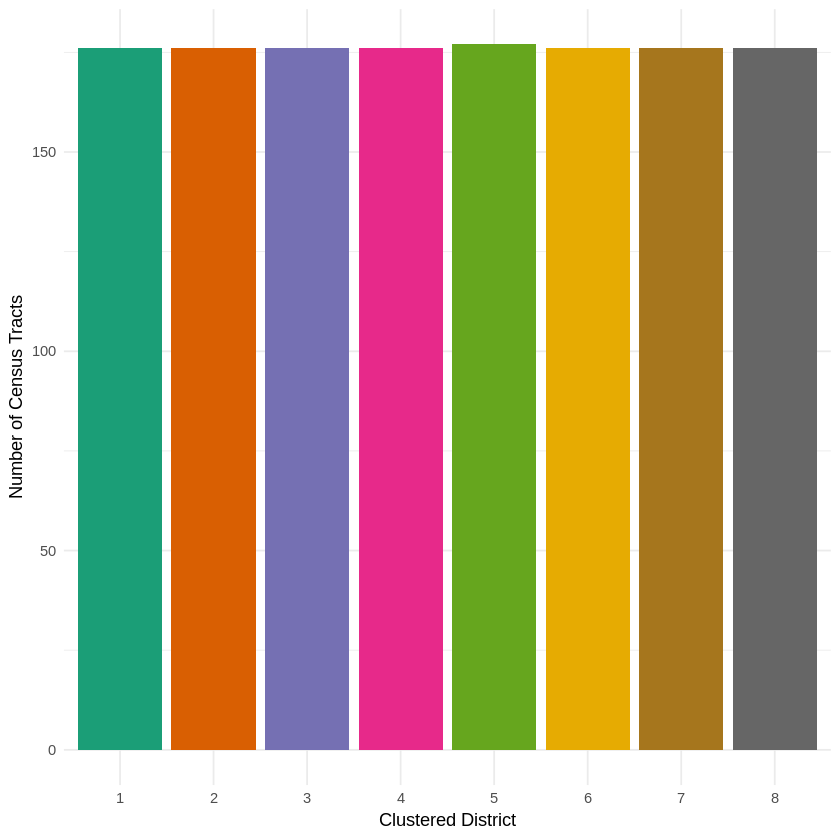

In [110]:
ggplot(plotdata %>% group_by(cluster) %>% summarize(Count = n())) +
    geom_col(aes(x = as.factor(cluster), y = Count, fill = as.factor(cluster))) +
    labs(x = "Clustered District", y = "Number of Census Tracts") + 
    theme_minimal() +
    theme(legend.position="none") +
    scale_fill_brewer(palette = "Dark2")

The clustered districts consist of roughly equal counts of Census tracts. 